# 2. Método de Halley

El método de Halley es funcional para encontrar raíces de funciones no lineales. este es un algoritmo para encontrar un cero de una función utilizada cuando la función sea de variable real posible de derivar 2 veces, siendo su segunda derivada continua. también podemos considerar que este método solo es una generalización del método de newton, con convergencia cúbica.

### Deducción del método

Como lo hemos presentado con anterioridad este método viene generalizado por el método de newton así que partiremos con su aplicación a la función.

$$g = \frac{f}{\sqrt{f'}}$$
asi es que $$x_{n+1} = x_{n} \frac{g(x)}{\sqrt{g'(x)}}$$
con $$g'(x) = \frac{2[f'(x)]^2 - f(x)f''(x)}{\sqrt{2f'(x)\sqrt{f'(x)}}}$$


y dado esto es que se estima que sí $f'(c) = 0$ se aplicara solo si g puede extenderse a c.

presentamos la ecuación general de Halley para el desarrollo de todo nuestro trabajo:

$$x_{n+1} = x_{n} -\frac{2f(x_{n})f'(x_{n})}{2f'(x_{n})^2-f(x_{n})f''(x_{n})}$$

<font color="green"> Ahora bien, para comprender el método nos ayudaremos del siguiente ejemplo práctico.</font>

### Ejemplo Practico 1 
Encontrar mediante el método de Halley la raíz de la función $f(x)=1/2-cos(x)$ con una tolerancia de $1x10^-9$ para el error absoluto, tal que $x \in [0,\pi]$ definimos la función y el intervalo inicial.

In [2]:
# importar todas las funciones de pylab
from pylab import *

# importar el módulo pyplot
import matplotlib.pyplot as plt

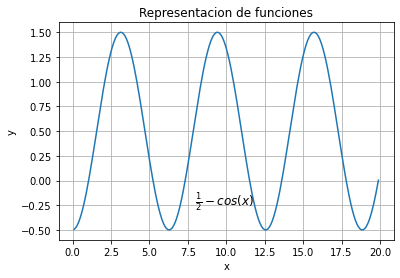

In [3]:
from math import *
from numpy import *

t = arange(0.1, 20, 0.1)

y1 = 1/2-cos(t)
p1 = plot(t, y1)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(8, -0.25, r'$\frac{1}{2}-cos(x)$', fontsize=12)
# Añado una malla al gráfico
grid()

title('Representacion de funciones')
xlabel('x')
ylabel('y')
show()

## 2.2. Algoritmo del método de Halley
A continuación, presentaremos el algoritmo o código del método de Halley para luego continuar a sacar su convergencia y otras definiciones para concluir con dicho método.

haremos uso de la formula general de Halley:

$$x_{n+1} = x_{n} -\frac{2f(x_{n})f'(x_{n})}{2f'(x_{n})^2-f(x_{n})f''(x_{n})}$$

Ahora bien, importemos la librerías que no servirán para el desarrollo de nuestro algoritmo

In [4]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tabulate import tabulate

In [6]:
import math
from math import exp, sqrt, sin, cos, pi

Definamos nuestra función con su primera y segunda derivada

In [7]:
#función del ejercicio 
def f(t):
    return 1/2-cos(t)

#primera derivada de la función

def df(t):
    return sin(t)

#segunda derivada de la función

def d2f(t):
    return cos(t)

In [8]:
f(0)

-0.5

In [9]:
f(pi)

1.5

In [10]:
f(pi/2)

0.49999999999999994

Definamos variables donde:
- __iter:__ número de iteraciones máximas
- __tol:__ tolerancia 
- __p0:__ valor inicial
- __listahalley:__ lista para representar el número de iteraciones

para __iter__ y __p0__ haremos uso de nuestro intervalo de $[0,\pi]$

In [11]:
iter=pi
tol=10**(-9)
p0=0
listahalley=[]

Presentando el logaritmo de Halley - para la realización del ejercicio anterior nos basaremos en presentar sus valores por medio de tabulaciones.

In [12]:
#algoritmo de halley
def halley(f,p0):                         #definiendo la función halley
    p=p0                                 #sobredefiniendo p0
    lista=[]                             #definiendo lista simple
    pp="-"                              
    error="-"
    for i in [*range(0, int(float(iter)))]:   #ciclo for para tomar encuenta el intervalo [0,pi]
        lista.append([i,p,f(p),df(p),error]) 
        listahalley.append(p)
        pp=p
        p=p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p) #formula de halley
        errorA=abs(p-pp)                        #encontrar el error de halley
        if p!=0:                                #iteraciones hasta encontrar 0
            errorB=abs(p-pp)/p
        errorC=abs(f(p))
        error=errorA
        if error<tol:                          #parar hasta que error sea menor que la tolerancia
            break                                 
    print(tabulate(lista,headers=["n","pn","f(pn)","f'(pn)","error"],tablefmt='fancy_grid')) #imprimiendo resultados en tabulaciones
    return p

Ya teniendo el logaritmo de Halley procederemos a llamar la función para presentar los valores en tabulaciones. 
<font color="green"> para ello solo necesitaremos la respectiva función halley con f = función y 0 = el valor inicial x0</font>

In [13]:
halley(f,0)

╒═════╤══════════╤═══════════╤══════════╤════════════════════╕
│   n │       pn │     f(pn) │   f'(pn) │ error              │
╞═════╪══════════╪═══════════╪══════════╪════════════════════╡
│   0 │ 0        │ -0.5      │ 0        │ -                  │
├─────┼──────────┼───────────┼──────────┼────────────────────┤
│   1 │ 0.5      │ -0.377583 │ 0.479426 │ 0.5                │
├─────┼──────────┼───────────┼──────────┼────────────────────┤
│   2 │ 0.872968 │ -0.142555 │ 0.766239 │ 0.3729677361865782 │
╘═════╧══════════╧═══════════╧══════════╧════════════════════╛


1.0286997633054566

## 2.3. Análisis de convergencia 
como lo hemos demostrado en el trabajo anterior el método de Halley converge con un orden cúbico, por lo que podemos decir que, si lo comparamos con el método de newton que es su generalización, va a converger más ligero siendo más eficiente ya que el método de newton tiende a converger a un orden cuadrático.

por tanto, vamos a derivar la fórmula 1 de Halley para encontrar su análisis de convergencia y también haremos lo mismo con el de newton para verificar que Halley converge más rápido

al derivar la ecuación 1 de Halley tenemos:
$$g'(x)=\frac{d}{dx}(1-\frac{2f'(x_{n})^22f'(x_{n})^2}{(2(f'(x_{n}))^2)^2}$$

Análisis de convergencia para método de Halley

In [14]:
def g(t):
    return abs(1-(2*f(t)**2*2*df(t)**2)/(2*(df(t))**2)**2)

In [15]:
g(-0.5), g(0.49), g(1.5)

(0.3797289267985642, 0.34001871334141687, 0.8148067891242188)

Análisis de convergencia para método de Newton


In [16]:
def g(t):
    return abs((f(t)*d2f(t))/df(t)**2)

In [17]:
g(-0.5), g(0.49), g(1.5)

(1.4416425238532342, 1.523079071475961, 0.03051755138368333)

Procederemos a graficar para ver su tendencia.

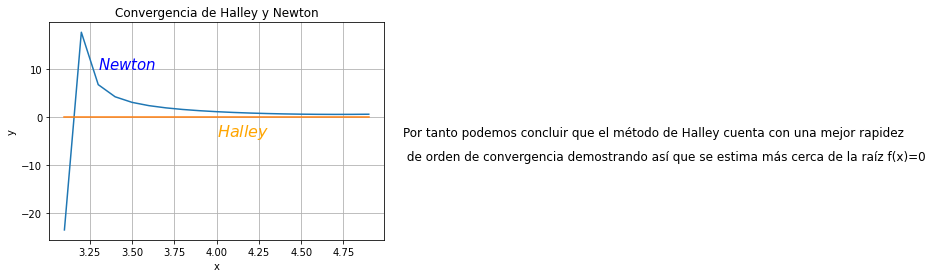

In [18]:
from math import *
from numpy import *

t = arange(3.1, 5, 0.1)

y1 = 1/2-cos(t)*cos(t)/sin(t)                                       #formula derivada de Newton
y2 = 1-(2*sin(t)**2*2*sin(t)**2)/(2*sin(t)**2)**2                   #formula derivada de Halley
p1, p2 = plot(t, y1, t, y2)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(3.3, 10, r'$Newton$', fontsize=15, color='b')
texto2 = text(4, -4, r'$Halley$', fontsize=16, color='orange')
texto3 = text(5.1, -4, r'Por tanto podemos concluir que el método de Halley cuenta con una mejor rapidez ', fontsize=12)
texto4 = text(5.1, -9, r' de orden de convergencia demostrando así que se estima más cerca de la raíz f(x)=0', fontsize=12)

# Añado una malla al gráfico
grid()

title('Convergencia de Halley y Newton')
xlabel('x')
ylabel('y')
show()

## 2.4. Análisis del error de Halley
como cualquier otro método es importante hacer un bosquejo de los errores cometidos al fin de poder estimar un mejor valor, entonces continuaremos a evaluar el error del método de Halley.

Continuamos a poner las librerías a usar se estima más cerca de la raíz


In [19]:
from __future__ import division

Primer punto comenzaremos a evaluar el error de forma general y así mismo vamos a ver la tendencia del error en una gráfica lineal.

Importemos las librerías a utilizar.


In [20]:
%matplotlib inline
from numpy import linspace
import matplotlib.pyplot as plt
import math
from math import exp, sqrt, sin, cos, pi
from matplotlib import pyplot as plt
import numpy as np

In [21]:
#algoritmo para encontrar el error
lista=[]
p0=0
p=p0
for i in [*range(0, int(float(pi)))]:                       #ciclo for para tomar encuenta el intervalo [0,pi]
        p = p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)           #formula general de Halley
        lista.append(p)
        print (p)

0.5
0.8729677361865782
1.0286997633054566


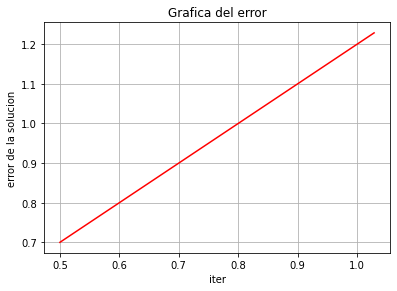

In [22]:
#Graficando el error del método
error=[]
for i in [*range(0, int(float(pi)))]:
    error.append(lista[i]-(-.2))
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8, 0.8])

axes.plot(lista ,error, 'r')
axes.set_xlabel('iter')
axes.set_ylabel('error de la solucion')
axes.set_title('Grafica del error')
axes.grid('on')

### Análisis del error del ejercicio práctico 1
A continuación, presentaremos un análisis del error más detallado mejorando dicho error aproximándolo y así lograremos ver si el resultado está dentro del nivel aceptable
definimos las variables a utilizar, donde:
- iter : número de iteraciones máximas
- p0: valor inicial


In [23]:
iter=pi
p0=0
listahalley=[]

In [24]:
#algoritmo para encontrar error de Halley
def error(f,p0):
    lista=[]
    p0=0
    p=p0
    for i in [*range(0, int(float(iter)))]:
        p = p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)
        lista.append(p)
    print (p)

In [25]:
error(f,0)

1.0286997633054566


Ahora continuaremos a sacar los tipos de error que el método de Halley puede presentar:
Como tenemos un proceso iterativo el error esta normalizado a un valor aproximado por tanto el error relativo porcentual $\xi_{a}$ se define así:

$$\xi_{a}= \frac{error aproximado*valor aproximado}{valor aproximado}*100%$$

llamando al error aproximado y valor aproximado

In [26]:
error(f,0) #error aproximado

1.0286997633054566


In [27]:
halley(f,0) #valor aproximado

╒═════╤══════════╤═══════════╤══════════╤════════════════════╕
│   n │       pn │     f(pn) │   f'(pn) │ error              │
╞═════╪══════════╪═══════════╪══════════╪════════════════════╡
│   0 │ 0        │ -0.5      │ 0        │ -                  │
├─────┼──────────┼───────────┼──────────┼────────────────────┤
│   1 │ 0.5      │ -0.377583 │ 0.479426 │ 0.5                │
├─────┼──────────┼───────────┼──────────┼────────────────────┤
│   2 │ 0.872968 │ -0.142555 │ 0.766239 │ 0.3729677361865782 │
╘═════╧══════════╧═══════════╧══════════╧════════════════════╛


1.0286997633054566

In [28]:
#definamos variables
erroraprox=1.0286997633054566
valoraprox=1.0286997633054566
f=g

g=abs((erroraprox-valoraprox/valoraprox)*1)
print("el error porcentual es:", g)


el error porcentual es: 0.02869976330545665


Ahora bien, nos importa que el valor absoluto porcentual sea menor que una tolerancia porcentual prefijada, la cual la definimos así:

$$|\xi_{a}|<\xi_{s}$$

si se cumple esta relación, entonces se considera que el resultado obtenido está dentro del nivel aceptable fijado previamente.


In [29]:
#definamos la relación
Ea=0.02869976330545665
Es=10**(-9)

if Ea <= Es:
    print("EL valor absoluto porcentual es mayor")
else:
    print("EL valor absoluto porcentual es menor")
    

EL valor absoluto porcentual es menor


<font color="green">Por tanto el resultado obtenido está dentro del nivel aceptable, concluyendo así que el método nos permite aproximar el error.</font>

## 2.5. Análisis de Eficiencia
Para sacar la eficiencia para un método $p>1$ en el que cada iteración necesita r evaluaciones de dicha función o derivadas se considera la siguiente formula
$$\xi(p,r) = p^{1/r}$$

también podemos considerar que cuando mayor sea la eficiencia de un método, mejor es el método. así mismo cuando está más cerca $X_{o}$ de la raíz, mayor será la eficiencia del método. Por lo tanto, la eficiencia y la convergencia están relacionadas entre sí, sabemos que Halley tiene un orden convergencia cúbico, por tanto:
$$\xi(3,3) = 3^{1/3}\succeq 1.4422$$


In [30]:
#codificando formula de eficiencia de halley
x=3
y=3
p=3
g=p**(1/y)
print("Eficiencia del método:",g)

Eficiencia del método: 1.4422495703074083


## 2.6 Implementación 2 para funciones

Sigamos probando el método de Halley para funciones racionales, ahora probemos este método para el siguiente ejercicio donde la función es continua en todo su dominio, para este desarrollo tomaremos en cuenta el siguiente ejercicio práctico.

### Ejemplo práctico 2
Encontrar mediante el método de Halley la raíz de la función $f(x)=log(t)+cos(4∗t)$ con una tolerancia de 1x10−9 para el error absoluto, tal que x ∈ [1,2] definimos la función y el intervalo inicial


In [31]:
# importar todas las funciones de pylab
from pylab import *
# importar el módulo pyplot
import matplotlib.pyplot as plt
import math
from math import exp, sqrt, sin, cos, log



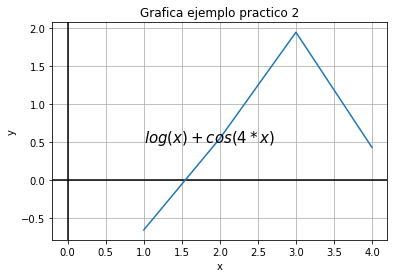

In [32]:
from math import *
from numpy import *
from matplotlib import pyplot
t = arange(1, 5)
# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

y1 = log(t) + cos(4*t)
p1 = plot(t, y1)

# Texto en la gráfica en coordenadas (x,y)
texto1 = text(1, 0.5, r'$log(x)+cos(4*x)$', fontsize=15)
# Añado una malla al gráfico
grid()

title('Grafica ejemplo practico 2')
xlabel('x')
ylabel('y')
show()

Definamos nuestra función, primera y segunda derivada.

In [33]:
#función del ejercicio 
def f(t):
    return log(t)+cos(4*t)

#primera derivada de la función

def df(t):
    return 1/t-4*sin(4*t)

#segunda derivada de la función

def d2f(t):
    return -1/(t**2)-16*cos(4*t)

In [34]:
 f(1), f(2)

(-0.6536436208636119, 0.5476471467513317)

Definamos variables donde:
- __iter:__ número de iteraciones máximas
- __tol:__ tolerancia 
- __p0:__ valor inicial
- __listahalley:__ lista para representar el número de iteraciones

para __iter__ y __p0__ haremos uso de nuestro intervalo de $[1,4]$

In [35]:
iter=2
tol=10**(-9)
p0=-1
listahalley=[]

Presentando el logaritmo de Halley - para la realización del ejercicio anterior presentaremos sus valores por medio de tabulaciones.

In [36]:
#algoritmo de halley
def halley(f,p0):                         #definiendo la función Halley
    p=p0                                 #sobredefiniendo p0
    lista=[]                             #definiendo lista simple
    pp="-"                              
    error="-"
    for i in [*range(int(float(-1))),(iter)]:   #ciclo for para tomar encuenta el intervalo [0,pi]
        lista.append([i,p,f(p),df(p),error]) 
        listahalley.append(p)
        pp=p
        p=abs(p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p)) #formula de halley
        errorA=abs(p-pp)                        #encontrar el error de halley
        if p!=0:                                #iteraciones hasta encontrar 0
            errorB=abs(p-pp)/p
        errorC=abs(f(p))
        error=errorA
        if error<tol:                          #parar hasta que error sea menor que la tolerancia
            break                                 
    print(tabulate(lista,headers=["n","pn","f(pn)","f'(pn)","error"],tablefmt='fancy_grid')) #imprimiendo resultados en tabulaciones
    return abs(p)

Ya teniendo el logaritmo de Halley procederemos a llamar la función para presentar los valores en tabulaciones. 
<font color="green"> para ello solo necesitaremos la respectiva función halley con f = función y 0 = el valor inicial x0</font>

In [37]:
halley(f,0.5)

╒═════╤══════╤══════════╤══════════╤═════════╕
│   n │   pn │    f(pn) │   f'(pn) │ error   │
╞═════╪══════╪══════════╪══════════╪═════════╡
│   2 │  0.5 │ -1.10929 │ -1.63719 │ -       │
╘═════╧══════╧══════════╧══════════╧═════════╛


1.4190317932828824

### Calculando el error del ejercicio anterior

In [38]:
iter=2
p0=0.5
listahalley=[]

In [39]:
#algoritmo para encontrar error de halley
def error(f,p0):
    lista=[]
    p0=0.5
    p=p0
    for i in [*range(int(float(-1))),(iter)]:
        p = abs(p-2*f(p)*df(p)/2*df(p)**2-f(p)*d2f(p))
        lista.append(p)
    print (p)

In [40]:
error(f,0.5) 

1.4190317932828824


Calculando el error relativo porcentual $\xi_{a}$ se define así:

$$\xi_{a}= \frac{error aproximado*valor aproximado}{valor aproximado}*100%$$

llamando al error aproximado y valor aproximado

In [41]:
error(f,0.5) #error aproximado

1.4190317932828824


In [42]:
halley(f,0.5) #valor aproximado

╒═════╤══════╤══════════╤══════════╤═════════╕
│   n │   pn │    f(pn) │   f'(pn) │ error   │
╞═════╪══════╪══════════╪══════════╪═════════╡
│   2 │  0.5 │ -1.10929 │ -1.63719 │ -       │
╘═════╧══════╧══════════╧══════════╧═════════╛


1.4190317932828824

In [43]:
#definamos variables
erroraprox=1.4190317932828824   #error aproximado
valoraprox=1.4190317932828824   #valor aproximado
f=g
g=abs((erroraprox-valoraprox/valoraprox)*1)  #formula para encontrar el error 
print("el error porcentual es:", g)
#definamos la relación
Ea=g
Es=10**(-9)     #comparando si el error porcentual es menor al tol
if Ea <= Es:
    print("EL valor absoluto porcentual es mayor")
else:
    print("EL valor absoluto porcentual es menor")

el error porcentual es: 0.4190317932828824
EL valor absoluto porcentual es menor


<font color="green" >Deduciendo que el error para este ejemplo está dentro del nivel aceptable

### 2.7. Ejercicio de aplicación de Halley

In [44]:
import math
from math import exp, sqrt, sin, cos, pi, asin

In [45]:
from PIL import Image 
import numpy as np
from matplotlib import pyplot as plt

Para determinar el volumen $V$ de un tanque $L$ cuya sección transversal es un semicírculo de radio r. se usa la formula:

$$V = L*[ \frac{\pi*r^2}{2}-r^2*arcsin(\frac{h}{r})-h*\sqrt{r^2-h^2} ]$$

![Tanque de Agua](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBLS4cMzEvX0n6K3VPslylV9gKBmP2NZnUinFvNkyu4piSmSs29QUqjijsqUZlF44zpLs&usqp=CAU)


sí $V = 12.4 m^2$, $L = 10m$ y $r = 1m$. Probar que existe un $h \in (0,1)$ tal que satisface la ecuación anterior. luego encontrar el valor de profundidad del agua, usando el método de Halley con $e_{s} = 0.5$%

<font color="green">EVALUANDO:
    

Definiendo variables a utilizar

In [46]:
#valor inicial
p0=0.2
#valor de la función 
def f(p): 
    return -0.665208
#primera derivada de la función
def df(p):
    return -19.5959
#segunda derivada de la función
def d2f(p):
    return 4.08248  
iter=1
listahalley=[] #definiendo lista simple
tol=5*10**-2

Ahora con la siguiente formula encontraremos los valores de $f(x),f'(x),f''(x)$ tomando en cuenta que $x0=0.2$

$$x_{n+1}= x_{n}-\frac{f(x_{n})}{f'(x_{n})} *[1-\frac{f(x_{n})}{f'(x_{n})}*\frac{f''(x_{n})}{2*f'(x_{n})}]^{-1}$$


In [47]:
#algoritmo de halley
def halley(f,p0):                         #definiendo la función halley                               
    lista=[]                             #definiendo lista simple
    p=p0                                 #sobredefiniendo p0
    pp="-"                              
    error="-"
    for i in [*range(0, int(float(iter)))]:   #ciclo for para tomar encuenta el intervalo [0,1]
        lista.append([i,p,f(p),df(p),d2f(p),error]) 
        listahalley.append(p)
        pp=p
        p=p0-f(p)*df(p)*(1-((f(p)/df(p))*(d2f(p)/(2*df(p)))))**-1     #formula de halley
        errorA=abs(p-pp)                        #encontrar el error de halley
        if p!=0:                                #iteraciones hasta encontrar 0
            errorB=abs(p-pp)/p
        errorC=abs(f(p))
        error=errorA
        if error<tol:                          #parar hasta que error sea menor que la tolerancia
            break                                 
    print(tabulate(lista,headers=["n","pn","f(pn)","f'(pn)","f''(pn)","error"],tablefmt='fancy_grid')) #imprimiendo resultados en tabulaciones
    

In [48]:
halley(f,0.2)

╒═════╤══════╤═══════════╤══════════╤═══════════╤═════════╕
│   n │   pn │     f(pn) │   f'(pn) │   f''(pn) │ error   │
╞═════╪══════╪═══════════╪══════════╪═══════════╪═════════╡
│   0 │  0.2 │ -0.665208 │ -19.5959 │   4.08248 │ -       │
╘═════╧══════╧═══════════╧══════════╧═══════════╧═════════╛


Dados los resultados tenemos:
- $x_{n} = 0.2)$
- $f(x_{n}) = -0.665208)$ 
- $f'(x_{n}) = -19.5959)$
- $f''(x_{n}) = 4.08248)$


Sabemos que si tenemos un valor inicial lo bastante próximo a la raíz se puede construir una hipérbola tangente a la gráfica f(x) hasta su segundo orden, cruzando así con el eje x asumiendo esta nuestra primera iteración y así se repite el proceso hasta el criterio de la parada.

muy bien utilicemos la siguiente formula:


$$x_{n+1}= x_{n}-\frac{f(x_{n})}{f'(x_{n})} *[1-\frac{f(x_{n})}{f'(x_{n})}*\frac{f''(x_{n})}{2*f'(x_{n})}]^{-1}$$

Ahora bien, ya tomando en cuenta lo anterior procedimos a evaluar la solución iterativa tomando en cuenta para dos iteraciones.
- donde $x_{n+1} = h$

$$x_{n+1}= h = 0.2-\frac{-0.665208)}{-19.5959)} *[1-\frac{-0.665208}{-19.5959}*\frac{4.08248)}{2*-19.5959)}]^{-1}$$

$$x_{n+1}= h = 0.166173$$

<font color="green" >__Gracias a sustituir los valores podemos decir que h siendo la raíz aproximada nos da un valor de $h=0.166173$ procedemos a sacar la profundidad total__

### Sacando Profundidad total
$$profundidad = r - h$$
donde 
- r = radio que en este caso es 1 y h = raíz aproximada 

<font color="green">__la profundad tiene un resultado de =  0.833827__



 ### solución por algoritmo

In [49]:
#algoritmo de Halley encontrando h y su profundidad
r=1

#valor inicial
p0=0.2
#valor de la función 
fp= -0.665208
#primera derivada de la función
dfp = -19.5959
#segunda derivada de la función
d2fp = 4.08248 
f=g
g=p0-fp/dfp*(1-((fp/dfp)*(d2fp/(2*dfp))))**-1     #formula de halley
print ("es valor de h es ", g , "metros")  #imprimiendo valor de h
#evaluando profundidad 
f=p
p= r-g
print("La profundidad total del tanque es: ",p) #imprimiendo profundidad total
            

es valor de h es  0.16617332886410618 metros
La profundidad total del tanque es:  0.8338266711358938
